# Downloading the dataset

In [ ]:
import requests

url = "https://data.sba.gov/dataset/0ff8e8e9-b967-4f4e-987c-6ac78c575087/resource/3f838176-6060-44db-9c91-b4acafbcb28c/download/foia-7a-fy2010-fy2019-asof-250930.csv"
response = requests.get(url)
with open("data.csv", "wb") as f:
    f.write(response.content)


# Exploratory Data Analysis

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("data.csv")

print(df.columns)

# Trimming the dataset for Approval FY 2014-2019
df = df[df["ApprovalFY"]>=2014]


for col in (df.columns):
    print(col, end =' - ')
    print(len(df[col].unique()))

/var/folders/lc/vr9hmgmn2670c0pqbv8k0t700000gn/T/ipykernel_54964/2543819111.py:4: DtypeWarning: Columns (14,34) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/7a_fy10-fy19.csv")


Index(['AsOfDate', 'Program', 'BorrName', 'BorrStreet', 'BorrCity',
       'BorrState', 'BorrZip', 'LocationID', 'BankName', 'BankFDICNumber',
       'BankNCUANumber', 'BankStreet', 'BankCity', 'BankState', 'BankZip',
       'GrossApproval', 'SBAGuaranteedApproval', 'ApprovalDate', 'ApprovalFY',
       'FirstDisbursementDate', 'ProcessingMethod', 'Subprogram',
       'InitialInterestRate', 'FixedorVariableInterestRate', 'TerminMonths',
       'NAICSCode', 'NAICSDescription', 'FranchiseCode', 'FranchiseName',
       'ProjectCounty', 'ProjectState', 'SBADistrictOffice',
       'CongressionalDistrict', 'BusinessType', 'BusinessAge', 'LoanStatus',
       'PaidinFullDate', 'ChargeoffDate', 'GrossChargeoffAmount',
       'RevolverStatus', 'JobsSupported', 'CollateralInd',
       'SoldSecondMarketInd'],
      dtype='object')
AsOfDate - 1
Program - 1
BorrName - 289136
BorrStreet - 310631
BorrCity - 20886
BorrState - 57
BorrZip - 21401
LocationID - 2532
BankName - 2353
BankFDICNumber - 2014
Ban

In [ ]:
# Dropping 'AsOfDate' and 'Program' since they have only one value
df = df.drop(columns=['AsOfDate', 'Program'])
df.reset_index(drop='True')
print(df.columns)

Index(['BorrName', 'BorrStreet', 'BorrCity', 'BorrState', 'BorrZip',
       'LocationID', 'BankName', 'BankFDICNumber', 'BankNCUANumber',
       'BankStreet', 'BankCity', 'BankState', 'BankZip', 'GrossApproval',
       'SBAGuaranteedApproval', 'ApprovalDate', 'ApprovalFY',
       'FirstDisbursementDate', 'ProcessingMethod', 'Subprogram',
       'InitialInterestRate', 'FixedorVariableInterestRate', 'TerminMonths',
       'NAICSCode', 'NAICSDescription', 'FranchiseCode', 'FranchiseName',
       'ProjectCounty', 'ProjectState', 'SBADistrictOffice',
       'CongressionalDistrict', 'BusinessType', 'BusinessAge', 'LoanStatus',
       'PaidinFullDate', 'ChargeoffDate', 'GrossChargeoffAmount',
       'RevolverStatus', 'JobsSupported', 'CollateralInd',
       'SoldSecondMarketInd'],
      dtype='object')


## Univariate analysis

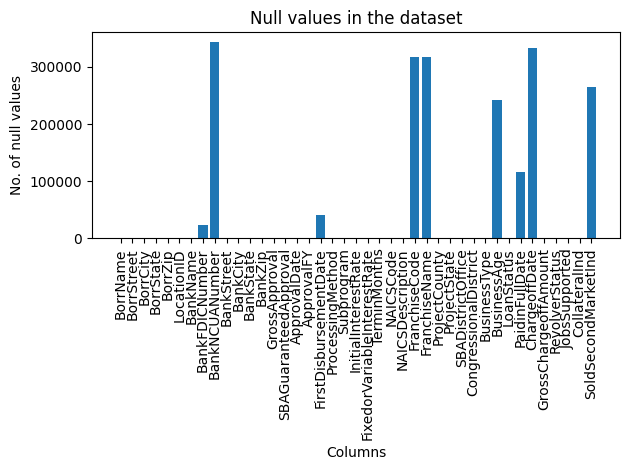

In [12]:
import matplotlib.pyplot as plt
# Null values in each column

nulls = df.isna().sum()
plt.figure(clear=True)
plt.bar(nulls.index, nulls)
plt.title("Null values in the dataset")
plt.tick_params(axis='x', labelrotation=90)
plt.xlabel("Columns")
plt.ylabel("No. of null values")
plt.tight_layout()
plt.show()